In [1]:

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
#Loading dataset from my local repository
loan_dataset_loaded = pd.read_csv('./loan.csv')
loan_dataset_loaded.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# understand my dataset informations
loan_dataset_loaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# check if my dataset has null values 
loan_dataset_loaded.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

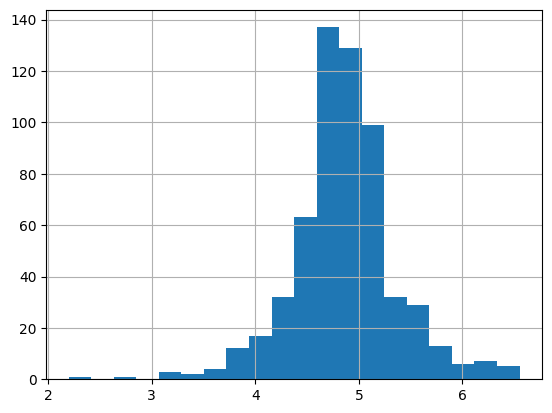

In [5]:
# plot loanamount into an histogram using log function 
loan_dataset_loaded['loan_amount_log'] = np.log(loan_dataset_loaded['LoanAmount'])
loan_dataset_loaded['loan_amount_log'].hist(bins = 20)
plt.show()

In [6]:
# indentify null values into my new columns 
loan_dataset_loaded.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loan_amount_log      22
dtype: int64

<AxesSubplot: >

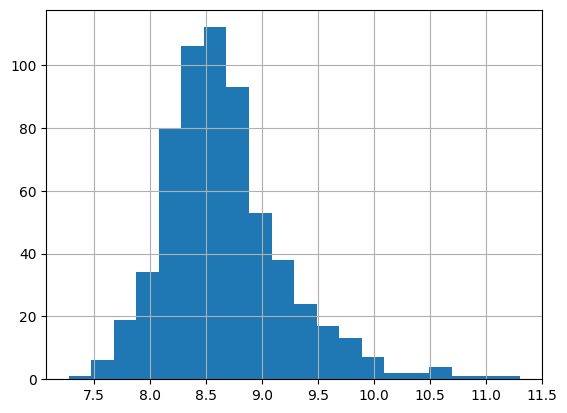

In [7]:

loan_dataset_loaded['total_income'] = loan_dataset_loaded['ApplicantIncome'] + loan_dataset_loaded['CoapplicantIncome']
loan_dataset_loaded['total_income_log'] = np.log(loan_dataset_loaded['total_income'])
loan_dataset_loaded['total_income_log'].hist(bins = 20)

In [8]:
loan_dataset_loaded.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'loan_amount_log', 'total_income', 'total_income_log'],
      dtype='object')

In [9]:
# indentify null values and handle them for columns which has null values 
loan_dataset_loaded['Gender'].fillna(loan_dataset_loaded['Gender'].mode()[0], inplace=True)
loan_dataset_loaded['Married'].fillna(loan_dataset_loaded['Married'].mode()[0], inplace=True)
loan_dataset_loaded['Self_Employed'].fillna(loan_dataset_loaded['Self_Employed'].mode()[0], inplace=True)
loan_dataset_loaded['Dependents'].fillna(loan_dataset_loaded['Dependents'].mode()[0], inplace=True)

loan_dataset_loaded.LoanAmount = loan_dataset_loaded.LoanAmount.fillna(loan_dataset_loaded.LoanAmount.mean())
loan_dataset_loaded.loan_amount_log = loan_dataset_loaded.loan_amount_log.fillna(loan_dataset_loaded.loan_amount_log.mean())


loan_dataset_loaded['Loan_Amount_Term'].fillna(loan_dataset_loaded['Loan_Amount_Term'].mode()[0], inplace=True)
loan_dataset_loaded['Credit_History'].fillna(loan_dataset_loaded['Credit_History'].mode()[0], inplace=True)

loan_dataset_loaded.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loan_amount_log      0
total_income         0
total_income_log     0
dtype: int64

In [10]:
# select some columns and perform training and testing 
X = loan_dataset_loaded.iloc[:,np.r_[1:5,9:11,13:15]].values # with iloc we are able to access rows or columns using index values 
y = loan_dataset_loaded.iloc[:,12].values
X

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [11]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [12]:
print('Per missing gender is %2f'%((loan_dataset_loaded['Gender'].isnull().sum() / loan_dataset_loaded.shape[0]) * 100))

Per missing gender is 0.000000


Number of people who took loan grouped by Gender
Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot: xlabel='Gender', ylabel='count'>

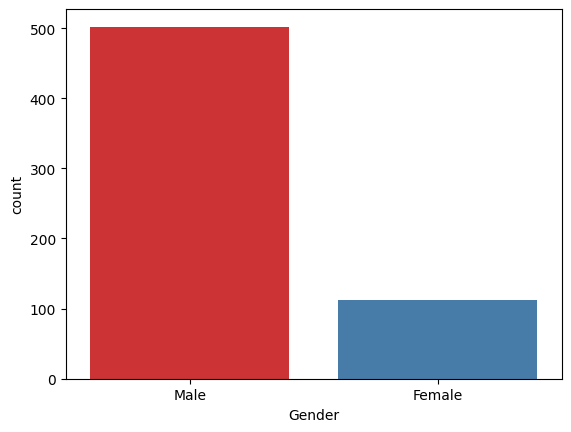

In [13]:
print('Number of people who took loan grouped by Gender')
print (loan_dataset_loaded['Gender'].value_counts())
sns.countplot(x = 'Gender', data = loan_dataset_loaded, palette='Set1')

Number of people who took loan grouped by martal status
Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot: xlabel='Married', ylabel='count'>

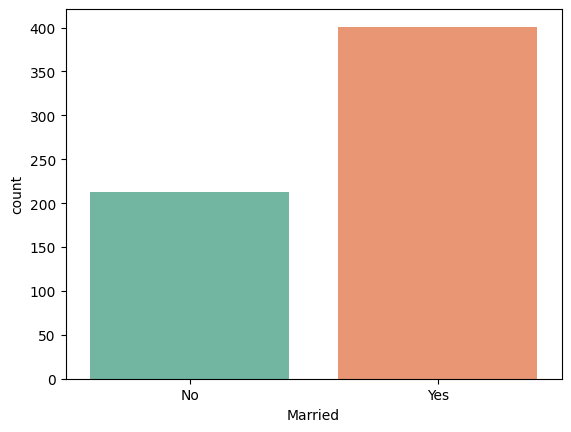

In [14]:
print('Number of people who took loan grouped by martal status')
print (loan_dataset_loaded['Married'].value_counts())
sns.countplot(x = 'Married', data = loan_dataset_loaded, palette='Set2')

Number of people who took loan grouped by dependents
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<AxesSubplot: xlabel='Dependents', ylabel='count'>

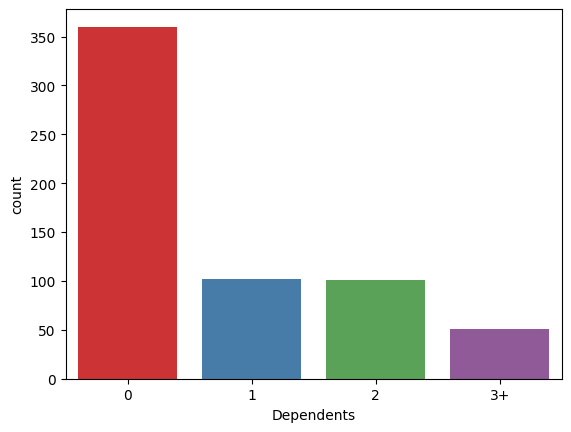

In [15]:
print('Number of people who took loan grouped by dependents')
print (loan_dataset_loaded['Dependents'].value_counts())
sns.countplot(x = 'Dependents', data = loan_dataset_loaded, palette='Set1')

Number of people who took loan grouped by self employeed
No     532
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot: xlabel='Self_Employed', ylabel='count'>

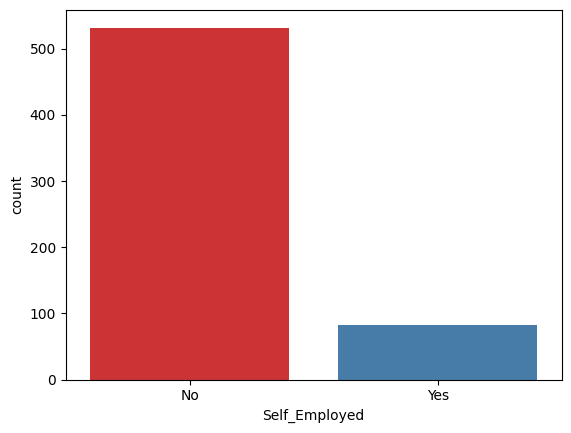

In [16]:
print('Number of people who took loan grouped by self employeed')
print (loan_dataset_loaded['Self_Employed'].value_counts())
sns.countplot(x = 'Self_Employed', data = loan_dataset_loaded, palette='Set1')

Number of people who took loan grouped by self Loan amount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


<AxesSubplot: xlabel='LoanAmount', ylabel='count'>

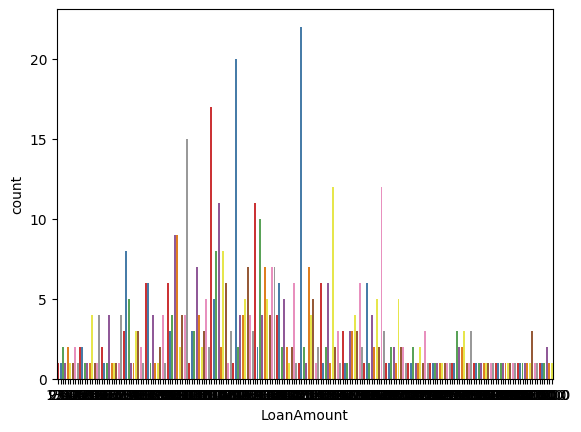

In [17]:
print('Number of people who took loan grouped by self Loan amount')
print (loan_dataset_loaded['LoanAmount'].value_counts())
sns.countplot(x = 'LoanAmount', data = loan_dataset_loaded, palette='Set1')

Number of people who took loan grouped by self Credit history
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<AxesSubplot: xlabel='Credit_History', ylabel='count'>

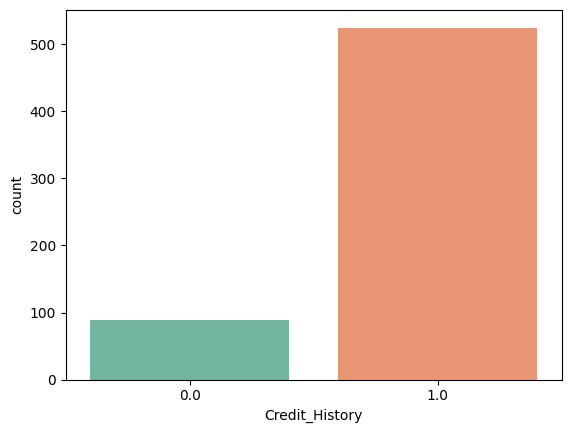

In [18]:
print('Number of people who took loan grouped by self Credit history')
print (loan_dataset_loaded['Credit_History'].value_counts())
sns.countplot(x = 'Credit_History', data = loan_dataset_loaded, palette='Set2')

In [19]:
# train my dataset as i have handled missing values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
LabelEncoder_x = LabelEncoder()